## Lab 2
### Part 2: Dealing with overfitting

Today we work with [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) (*hint: it is available in `torchvision`*).

Your goal for today:
1. Train a FC (fully-connected) network that achieves >= 0.885 test accuracy.
2. Cause considerable overfitting by modifying the network (e.g. increasing the number of network parameters and/or layers) and demonstrate in in the appropriate way (e.g. plot loss and accurasy on train and validation set w.r.t. network complexity).
3. Try to deal with overfitting (at least partially) by using regularization techniques (Dropout/Batchnorm/...) and demonstrate the results.

__Please, write a small report describing your ideas, tries and achieved results in the end of this file.__

*Note*: Tasks 2 and 3 are interrelated, in task 3 your goal is to make the network from task 2 less prone to overfitting. Task 1 is independent from 2 and 3.

*Note 2*: We recomment to use Google Colab or other machine with GPU acceleration.

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchsummary
from IPython.display import clear_output
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import os


device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [2]:
# Technical function
def mkdir(path):
    if not os.path.exists(root_path):
        os.mkdir(root_path)
        print('Directory', path, 'is created!')
    else:
        print('Directory', path, 'already exists!')
        
root_path = 'fmnist'
mkdir(root_path)

Directory fmnist already exists!


In [3]:
download = True
train_transform = transforms.ToTensor()
test_transform = transforms.ToTensor()
transforms.Compose((transforms.ToTensor()))


fmnist_dataset_train = torchvision.datasets.FashionMNIST(root_path, 
                                                        train=True, 
                                                        transform=train_transform,
                                                        target_transform=None,
                                                        download=download)
fmnist_dataset_test = torchvision.datasets.FashionMNIST(root_path, 
                                                       train=False, 
                                                       transform=test_transform,
                                                       target_transform=None,
                                                       download=download)

In [4]:
BATCH_SIZE = 256
train_size = fmnist_dataset_train.data.shape[0]
validation_size = int(0.2 * train_size)

print("Train size:", train_size - validation_size)
print("Validation size:", validation_size)

Train size: 48000
Validation size: 12000


In [5]:
train_subset, validation_subset = torch.utils.data.random_split(fmnist_dataset_train,
                                                                [train_size - validation_size, validation_size],
                                                                generator=torch.Generator().manual_seed(42))

In [6]:
train_loader = torch.utils.data.DataLoader(train_subset, 
                                           batch_size=BATCH_SIZE,
                                           shuffle=True,
                                           num_workers=2)
validation_loader = torch.utils.data.DataLoader(validation_subset, 
                                           batch_size=BATCH_SIZE,
                                           shuffle=False,
                                           num_workers=2)
test_loader = torch.utils.data.DataLoader(fmnist_dataset_test,
                                          batch_size=BATCH_SIZE,
                                          shuffle=False,
                                          num_workers=2)

print("Train shape:", fmnist_dataset_train.data.shape)
print("Test shape:", fmnist_dataset_test.data.shape)
print("Number of classes:", np.unique(fmnist_dataset_train.targets).shape[0])

Train shape: torch.Size([60000, 28, 28])
Test shape: torch.Size([10000, 28, 28])
Number of classes: 10


In [7]:
for img, label in train_loader:
    print(img.shape)
#     print(img)
    print(label.shape)
    print(label.size(0))
    break

torch.Size([256, 1, 28, 28])
torch.Size([256])
256


### Task 1
Train a network that achieves $\geq 0.885$ test accuracy. It's fine to use only Linear (`nn.Linear`) layers and activations/dropout/batchnorm. Convolutional layers might be a great use, but we will meet them a bit later.

In [ ]:
class TinyNeuralNetwork(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10, input_channels=1):
        super(self.__class__, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.BatchNorm1d(num_features=input_shape),
            nn.Dropout(p=0.1),
            nn.Linear(input_shape, input_shape),
            nn.ReLU(),
            nn.BatchNorm1d(num_features=input_shape),
            nn.Dropout(p=0.1),
            nn.Linear(input_shape, input_shape),
            nn.ReLU(),
            nn.BatchNorm1d(num_features=input_shape),
            nn.Dropout(p=0.1),
            nn.Linear(input_shape, input_shape),
            nn.ReLU(),
            nn.BatchNorm1d(num_features=input_shape),
            nn.Dropout(p=0.1),
            nn.Linear(input_shape, input_shape),
            nn.ReLU(),
            nn.BatchNorm1d(num_features=input_shape),
            nn.Dropout(p=0.1),
            nn.Linear(input_shape, input_shape),
            nn.ReLU(),
            nn.BatchNorm1d(num_features=input_shape),
            nn.Dropout(p=0.1),
            nn.Linear(input_shape, num_classes)
        )
        
    def forward(self, inp):       
        out = self.model(inp)
        return out

In [ ]:
torchsummary.summary(TinyNeuralNetwork().to(device), (28*28,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
       BatchNorm1d-2                  [-1, 784]           1,568
           Dropout-3                  [-1, 784]               0
            Linear-4                  [-1, 784]         615,440
              ReLU-5                  [-1, 784]               0
       BatchNorm1d-6                  [-1, 784]           1,568
           Dropout-7                  [-1, 784]               0
            Linear-8                  [-1, 784]         615,440
              ReLU-9                  [-1, 784]               0
      BatchNorm1d-10                  [-1, 784]           1,568
          Dropout-11                  [-1, 784]               0
           Linear-12                  [-1, 784]         615,440
             ReLU-13                  [-1, 784]               0
      BatchNorm1d-14                  [

Your experiments come here:

In [ ]:
from collections.abc import Callable, Iterable

In [ ]:
def plot_epoch(history: list):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
    train_loss, train_acc, val_loss, val_acc = zip(*history)
    ax[0].plot(train_loss, label='train_loss', color="red")
    ax[0].plot(val_loss, label='val_loss', color="blue")
    ax[1].plot(train_acc, label='train_acc', color="green")
    ax[1].plot(val_acc, label='val_acc', color="lime")
    ax[0].set_title('Loss')
    ax[1].set_title('Accuracy')

    ax[0].legend(loc='best')
    ax[1].legend(loc='best')
    
    ax[0].set_xlabel("epochs")
    ax[0].set_ylabel("loss")
 
    ax[1].set_xlabel("epochs")
    ax[1].set_ylabel("accuracy")

    plt.show()

In [48]:
def fit_epoch(model, tepoch, criterion, optimizer):
    running_loss = 0.0
    running_corrects = 0
    processed_data = 0

    model.train()

    for inputs, labels in tepoch:
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()

        outputs = model.forward(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        preds = torch.argmax(outputs, 1).cpu().detach().numpy()
        running_loss += loss.item() * inputs.shape[0]
        running_corrects += np.sum(preds == labels.cpu().numpy())
        processed_data += inputs.shape[0]
        tepoch.set_postfix(loss=loss.item(),
                accuracy=str(100. * running_corrects / processed_data)[:4])
              
    train_loss = running_loss / processed_data
    train_acc = running_corrects / processed_data
    return train_loss, train_acc

def eval_epoch(model, val_loader, criterion, optimizer):
    running_loss = 0.0
    running_corrects = 0
    processed_size = 0
    model.eval()
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            preds = torch.argmax(outputs, 1).cpu().detach().numpy()


            running_loss += loss.item() * inputs.shape[0]
            running_corrects += np.sum(preds == labels.cpu().numpy())
            processed_size += inputs.shape[0]
    val_loss = running_loss / processed_size
    val_acc = running_corrects / processed_size
    return val_loss, val_acc

In [51]:
import time
from tqdm import tqdm
def train_model(model: nn.Module, train_loader: Iterable,
                val_loader: Iterable, optimizer: Callable,
                criterion: Callable, show: bool=True, 
                n_epochs: int=20, log_time: bool=True
                ):
                
    history = []
    times = []
    log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f} \
    val_loss {v_loss:0.4f} train_acc {t_acc:0.4f} val_acc {v_acc:0.4f}"
    start_time = time.time() if log_time else None
    for epoch in range(n_epochs):

        # train step
        with tqdm(train_loader, unit="batch") as tepoch:
            tepoch.set_description("Epoch {} / {}".format(epoch + 1, n_epochs))
            train_loss, train_acc = fit_epoch(model, tepoch, criterion, optimizer)

        # validation step
        val_loss, val_acc = eval_epoch(model, val_loader, criterion, optimizer)
        history.append((train_loss, train_acc, val_loss, val_acc))
        if start_time:
            times.append(time.time() - start_time)
        if show:
            clear_output(wait=True)
            plot_epoch(history)
        tepoch.update(1)
        tqdm.write(log_template.format(ep=epoch+1, t_loss=train_loss,\
                                        v_loss=val_loss, t_acc=train_acc, v_acc=val_acc))
    if log_time:
        return history, times
    return history

In [54]:
from sklearn.metrics import accuracy_score
def predict(model: nn.Module, test_loader: Iterable, scoring: bool=True):
    model.eval()
    predictions = []
    accuracies = []
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        preds = torch.argmax(outputs, 1).cpu().detach().numpy()
        predictions += list(preds)
        if scoring:
            accuracies.append(accuracy_score(preds, labels.cpu().numpy()))
    if scoring:
        print("Accuracy score: ", np.mean(accuracies))
    return predictions

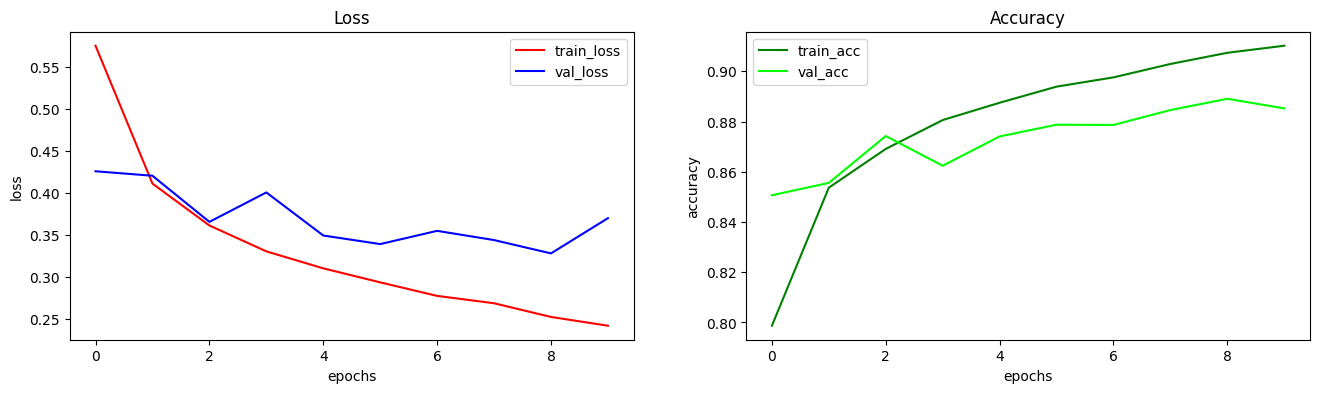


Epoch 010 train_loss: 0.2422     val_loss 0.3702 train_acc 0.9102 val_acc 0.8852


In [62]:
model = TinyNeuralNetwork().to(device)
opt = torch.optim.AdamW(model.parameters(), lr=3e-3, betas=[0.5, 0.5])
loss_func = nn.CrossEntropyLoss()


history = train_model(model, train_loader, validation_loader, opt, loss_func, n_epochs=10)

In [63]:
predict(model, test_loader);

Accuracy score:  0.87880859375


### Task 2: Overfit it.
Build a network that will overfit to this dataset. Demonstrate the overfitting in the appropriate way (e.g. plot loss and accurasy on train and test set w.r.t. network complexity).

*Note:* you also might decrease the size of `train` dataset to enforce the overfitting and speed up the computations.

In [72]:
class OverfittingNeuralNetwork(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10, input_channels=1):
        super(self.__class__, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape, input_shape),
            nn.ReLU(),
            nn.Linear(input_shape, num_classes)
        )
        
    def forward(self, inp):       
        out = self.model(inp)
        return out

In [73]:
torchsummary.summary(OverfittingNeuralNetwork().to(device), (28*28,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 784]         615,440
              ReLU-3                  [-1, 784]               0
            Linear-4                   [-1, 10]           7,850
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 2.38
Estimated Total Size (MB): 2.40
----------------------------------------------------------------


In [74]:
torch.cuda.empty_cache()

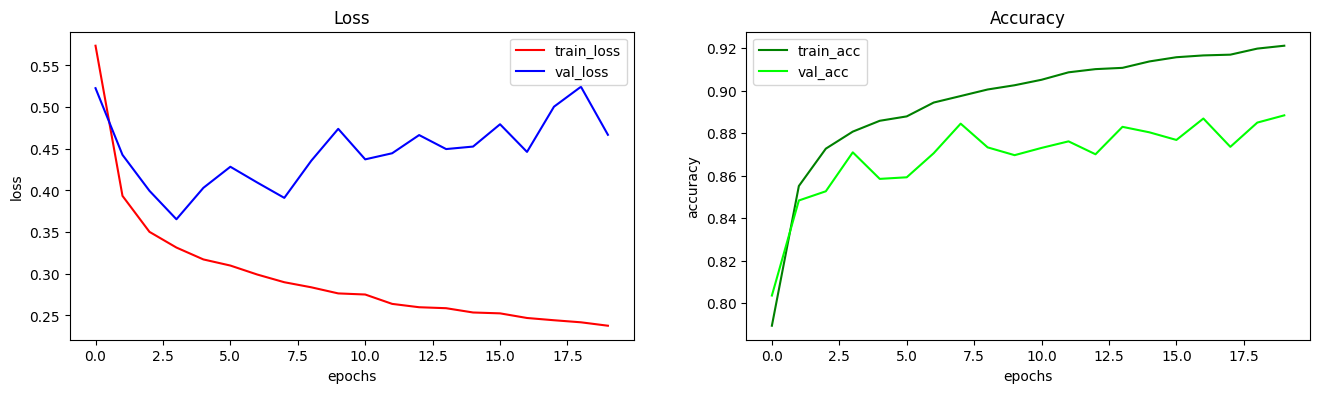


Epoch 020 train_loss: 0.2377     val_loss 0.4668 train_acc 0.9212 val_acc 0.8884


In [76]:
model = OverfittingNeuralNetwork().to(device)
opt = torch.optim.AdamW(model.parameters(), lr=3e-3, betas=[0.5, 0.5])
loss_func = nn.CrossEntropyLoss()

history = train_model(model, train_loader, validation_loader, opt, loss_func, n_epochs=20)

### Task 3: Fix it.
Fix the overfitted network from the previous step (at least partially) by using regularization techniques (Dropout/Batchnorm/...) and demonstrate the results. 

In [77]:
class FixedNeuralNetwork(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10, input_channels=1):
        super(self.__class__, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(p=0.3),
            nn.BatchNorm1d(input_shape),
            nn.Linear(input_shape, input_shape),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.BatchNorm1d(input_shape),
            nn.Linear(input_shape, num_classes)
        )
        
    def forward(self, inp):       
        out = self.model(inp)
        return out

In [78]:
torchsummary.summary(FixedNeuralNetwork().to(device), (28*28,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
           Dropout-2                  [-1, 784]               0
       BatchNorm1d-3                  [-1, 784]           1,568
            Linear-4                  [-1, 784]         615,440
              ReLU-5                  [-1, 784]               0
           Dropout-6                  [-1, 784]               0
       BatchNorm1d-7                  [-1, 784]           1,568
            Linear-8                   [-1, 10]           7,850
Total params: 626,426
Trainable params: 626,426
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.04
Params size (MB): 2.39
Estimated Total Size (MB): 2.43
----------------------------------------------------------------


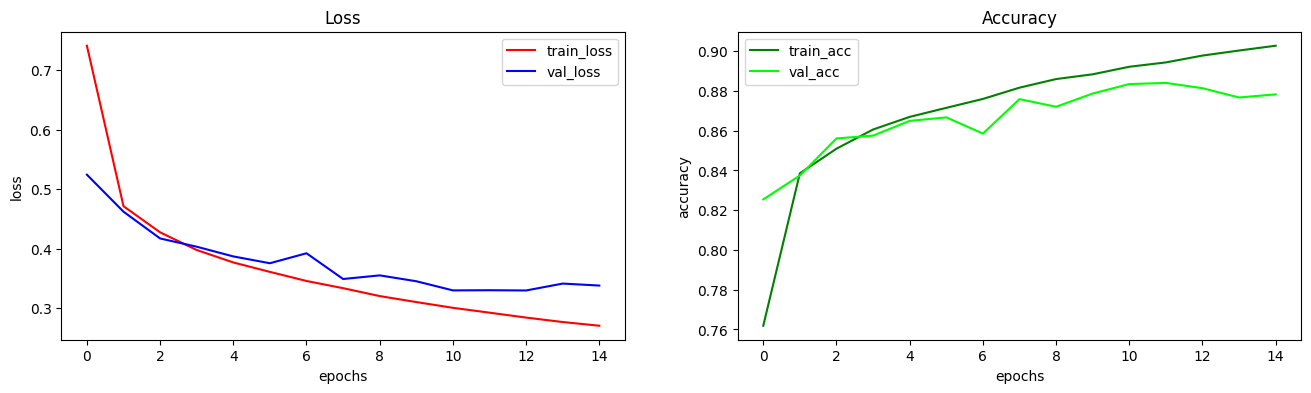


Epoch 015 train_loss: 0.2704     val_loss 0.3379 train_acc 0.9027 val_acc 0.8782


In [80]:
model = OverfittingNeuralNetwork().to(device)
opt = torch.optim.AdamW(model.parameters(), lr=3e-4, betas=[0.5, 0.5])
loss_func = nn.CrossEntropyLoss()

history = train_model(model, train_loader, validation_loader, opt, loss_func, n_epochs=15)

In [82]:
predict(model, test_loader);

Accuracy score:  0.87197265625


### Conclusions:

As we can see, models with a large number of trainable parameters and epochs without `Dropout` and `BatchNorm` are more prone to overfitting than models that are subject to some restrictions. It can also be seen that regularization greatly helps to combat overfitting, as shown by the graph for the latest model. After the introduction of regularization, the graph for `accuracy` on the validation set became less noisy, which indicates a decrease in the `variance` of the model.